# Plotting Monthly Returns of Vanguard Small Cap ETF

## Import libraries and data
Pandas allows us to import data, requests will allows us to retrieve data from the TD Ameritrade API and config is the python file in the project folder that contains my TD Ameritrade API client id.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from config import client_id

## Get data from TD Amertrade API

In [2]:
# Enter name of data file to be saved
DATA_FILE = 'vb_price_history.csv'

# Choose tickers to be searched
ticker = ['VB']

# Intialize a list
price_history = []

for stock in ticker:

    # Set url to be accessed
    endpoint = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(stock)
    
    # Set conditions for data to be received
    payload = {'apikey': client_id,
              'periodType': 'year',
               'period': 5,
              'frequencyType': 'monthly',
              'frequency': '1',
              'endDate': 1580364000000,
              'startDate': 1420128000000}

    content = requests.get(url = endpoint, params = payload)

    # Convert data from json
    data = content.json()
    
    # Loop to add stock candle info to the dictionary
    for i in data['candles']:
        # Write the symbol to the dictionary
        i['symbol'] = data['symbol']
        # Add all the data
        price_history.append(i)

# Convert to datafram and save the csv file
price_history = pd.DataFrame(price_history)
price_history.to_csv(DATA_FILE, index_label=False)

## Create a function to load data from the csv file

In [3]:
def load_data():
    csv_file = pd.read_csv(DATA_FILE)
    return csv_file

## Assign a variable to the csv file and change the datetime format to yyyy/mm/dd

In [4]:
price_history = load_data()
display(price_history.head(), price_history.tail())

,open,high,low,close,volume,datetime,symbol
0,117.25,117.51,112.1600,114.16,10480636,1420092000000,VB
1,114.38,121.46,112.8500,120.78,7588161,1422770400000,VB
2,120.85,123.90,117.9101,122.56,10478832,1425189600000,VB
3,122.16,124.40,119.6484,120.06,10178882,1427864400000,VB
4,120.44,124.00,119.2200,122.48,8571080,1430456400000,VB


,open,high,low,close,volume,datetime,symbol
56,151.17,159.19,149.7100,153.89,8772263,1567314000000,VB
57,154.53,158.24,147.4922,156.43,10185310,1569906000000,VB
58,157.38,164.26,157.0500,163.00,9384739,1572584400000,VB
59,163.41,166.99,159.2600,165.64,12622840,1575180000000,VB
60,166.50,170.50,161.8553,162.30,21846336,1577858400000,VB


Pandas has a convenient pd.to_datetime function allowing us to change the date format

In [5]:
price_history['datetime'] = pd.to_datetime(price_history['datetime'], unit='ms')
display(price_history.head(), price_history.tail())

,open,high,low,close,volume,datetime,symbol
0,117.25,117.51,112.1600,114.16,10480636,2015-01-01 06:00:00,VB
1,114.38,121.46,112.8500,120.78,7588161,2015-02-01 06:00:00,VB
2,120.85,123.90,117.9101,122.56,10478832,2015-03-01 06:00:00,VB
3,122.16,124.40,119.6484,120.06,10178882,2015-04-01 05:00:00,VB
4,120.44,124.00,119.2200,122.48,8571080,2015-05-01 05:00:00,VB


,open,high,low,close,volume,datetime,symbol
56,151.17,159.19,149.7100,153.89,8772263,2019-09-01 05:00:00,VB
57,154.53,158.24,147.4922,156.43,10185310,2019-10-01 05:00:00,VB
58,157.38,164.26,157.0500,163.00,9384739,2019-11-01 05:00:00,VB
59,163.41,166.99,159.2600,165.64,12622840,2019-12-01 06:00:00,VB
60,166.50,170.50,161.8553,162.30,21846336,2020-01-01 06:00:00,VB


## Create a column for percent_change of the close price
Groupby and transform functions are used to find the percent change for 1 period. Multiply by 100 to get the percentage

In [7]:
price_history['percent_change'] = price_history.groupby('symbol')['close'].transform(lambda x: x.pct_change(periods = 1))
price_history['percent_change'] = price_history['percent_change'] * 100
display(price_history.head(15))

,open,high,low,close,volume,datetime,symbol,percent_change
0,117.25,117.5100,112.1600,114.16,10480636,2015-01-01 06:00:00,VB,NaN
1,114.38,121.4600,112.8500,120.78,7588161,2015-02-01 06:00:00,VB,5.798879
2,120.85,123.9000,117.9101,122.56,10478832,2015-03-01 06:00:00,VB,1.473754
3,122.16,124.4000,119.6484,120.06,10178882,2015-04-01 05:00:00,VB,-2.039817
4,120.44,124.0000,119.2200,122.48,8571080,2015-05-01 05:00:00,VB,2.015659
5,123.27,125.5100,120.9300,121.47,8574284,2015-06-01 05:00:00,VB,-0.824624
6,122.61,123.4300,117.5200,121.12,11727990,2015-07-01 05:00:00,VB,-0.288137
7,121.15,121.8550,90.0300,114.06,16214175,2015-08-01 05:00:00,VB,-5.828930
8,112.92,117.4100,105.8600,107.95,11761679,2015-09-01 05:00:00,VB,-5.356830
9,107.97,115.1300,106.2500,114.08,9554097,2015-10-01 05:00:00,VB,5.678555


In [8]:
# Get descriptive statistics
price_history.describe()

,open,high,low,close,volume,percent_change
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,60.000000
mean,135.695246,139.759038,130.793244,136.175082,1.302839e+07,0.677640
std,18.097651,18.488547,18.716609,18.041353,4.026457e+06,4.247711
min,101.680000,104.250000,90.030000,102.290000,7.588161e+06,-11.611866
25%,120.850000,123.430000,116.374500,121.120000,1.033785e+07,-0.977080
50%,135.480000,137.780000,130.457000,135.540000,1.232571e+07,1.193946
75%,151.480000,157.080000,146.377600,152.250000,1.459258e+07,2.414596
max,166.500000,170.500000,161.855300,165.660000,3.145344e+07,11.713009


## Create a function to save png copies of plots

In [9]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Plot the returns
I used the x label as an annotation for the chart. 
The ETF's mean monthly return is positively skewed. Heavy losses have been suffered on occasion, but overall returns are positive.

Saving figure vb_plot


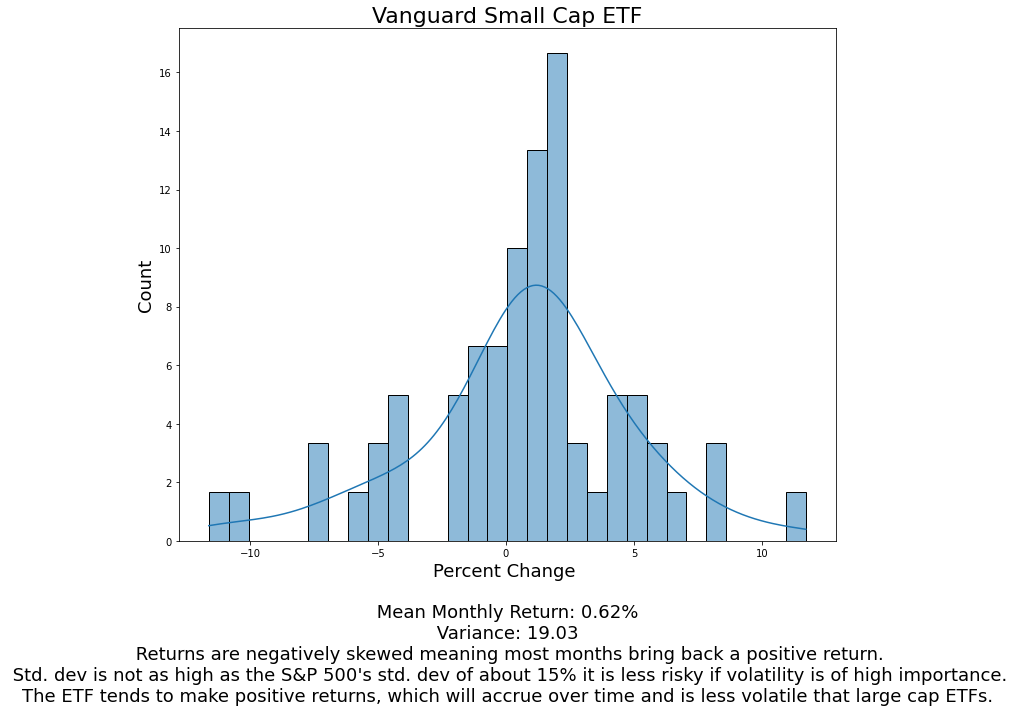

In [10]:
# Setting a variable for our histogram data
x = price_history['percent_change']

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(x=x, bins=30, kde=True, stat='percent', ax=ax)
ax.set_xlabel("Percent Change \n\n Mean Monthly Return: 0.62% \n Variance: 19.03 \n Returns are negatively skewed meaning "
              "most months bring back a positive return.\n Std. dev is not as high as the S&P 500's std. dev of about 15% " 
              "it is less risky if volatility is of high importance.\n"
              "The ETF tends to make positive returns, which will accrue over time and is less volatile that large cap ETFs."
              , size=18)
ax.set_ylabel("Count", size=18)
ax.set_title("Vanguard Small Cap ETF", size=22)

# Save the plot
save_fig(fig_id='vb_plot')